# Multi-Layer Perceptron

This notebook implements a Multi-Layer Perceptron (MLP) for comparison with the Single-Layer Perceptron in the other notebook.

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

## Data Preparation

In [111]:
# Load data
data = pd.read_csv('iris.csv')
data.columns = ['Sepal_len_cm','Sepal_wid_cm','Petal_len_cm','Petal_wid_cm','Type']
data.head(10)

,Sepal_len_cm,Sepal_wid_cm,Petal_len_cm,Petal_wid_cm,Type
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
5,4.6,3.4,1.4,0.3,0
6,5.0,3.4,1.5,0.2,0
7,4.4,2.9,1.4,0.2,0
8,4.9,3.1,1.5,0.1,0
9,5.4,3.7,1.5,0.2,0


In [112]:
# Prepare features and labels
X = data.drop('Type', axis=1).values
y = data['Type'].values

# Convert to one-hot encoding for multi-class classification
def to_one_hot(labels):
    n_classes = len(np.unique(labels))
    one_hot = np.zeros((labels.shape[0], n_classes))
    for i, label in enumerate(labels):
        if label == -1:  # First class
            one_hot[i, 0] = 1
        elif label == 0:  # Second class
            one_hot[i, 1] = 1
        else:  # Third class (label == 1)
            one_hot[i, 2] = 1
    return one_hot

y_one_hot = to_one_hot(y)

print("Features shape:", X.shape)
print("Labels shape:", y_one_hot.shape)

Features shape: (149, 4)
Labels shape: (149, 3)


In [113]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (104, 4) (104, 3)
Testing set shape: (45, 4) (45, 3)


## MLP Implementation

In [114]:
class MultiLayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.1
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.1
        self.b2 = np.zeros((1, self.output_size))
        
    def sigmoid(self, x):
        # Clip x to prevent overflow
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, X):
        # Forward propagation
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    
    def backward(self, X, y, output):
        # Backward propagation
        m = X.shape[0]
        
        # Calculate gradients
        dZ2 = output - y
        dW2 = (1/m) * np.dot(self.a1.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
        
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.sigmoid_derivative(self.a1)
        dW1 = (1/m) * np.dot(X.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
        
        # Update weights and biases
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
    
    def train(self, X, y, epochs):
        self.losses = []
        
        for i in range(epochs):
            # Forward propagation
            output = self.forward(X)
            
            # Calculate loss (Mean Squared Error)
            loss = np.mean((output - y) ** 2)
            self.losses.append(loss)
            
            # Backward propagation
            self.backward(X, y, output)
            
            if i % 100 == 0:
                print(f"Epoch {i}, Loss: {loss}")
    
    def predict(self, X):
        output = self.forward(X)
        # Convert probabilities to class predictions
        return np.argmax(output, axis=1)
    
    def predict_proba(self, X):
        return self.forward(X)

## Training the MLP

In [115]:
# Create MLP model
# Input: 4 features, Hidden: 10 neurons, Output: 3 classes
mlp = MultiLayerPerceptron(input_size=4, hidden_size=10, output_size=3, learning_rate=0.5)

In [116]:
# Train the model
print("Training MLP...")
mlp.train(X_train, y_train, epochs=1000)

Training MLP...
Epoch 0, Loss: 0.2666974690463228
Epoch 100, Loss: 0.07925939937341209
Epoch 200, Loss: 0.04298266317276589
Epoch 300, Loss: 0.016967085228474774
Epoch 400, Loss: 0.008826491047594153
Epoch 500, Loss: 0.006094762443827007
Epoch 600, Loss: 0.004796617157091158
Epoch 700, Loss: 0.004037692763702873
Epoch 800, Loss: 0.003534679882226559
Epoch 900, Loss: 0.0031723518774214045


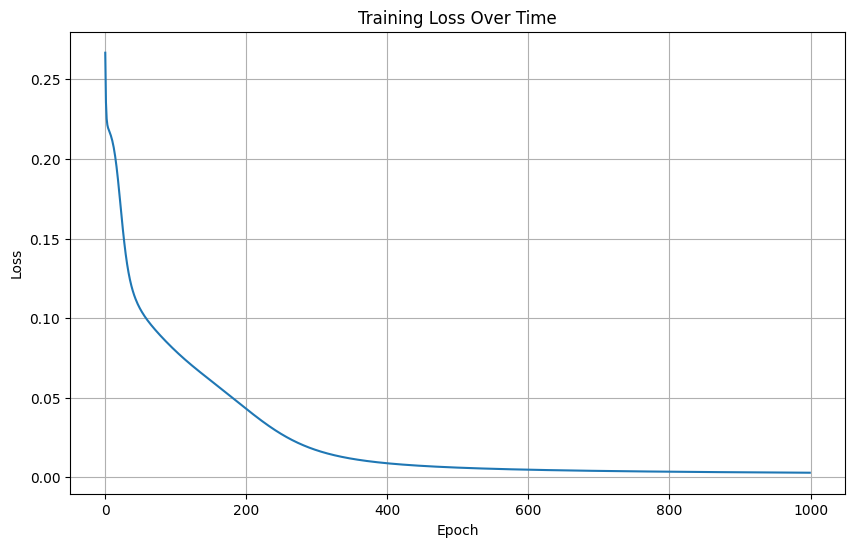

In [117]:
# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(mlp.losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

## Evaluation

In [118]:
# Convert one-hot encoded labels back to class labels for evaluation
def from_one_hot(one_hot):
    return np.argmax(one_hot, axis=1)

# Predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

y_train_true = from_one_hot(y_train)
y_test_true = from_one_hot(y_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train_true, y_train_pred)
test_accuracy = accuracy_score(y_test_true, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 100.00%
Testing Accuracy: 93.33%


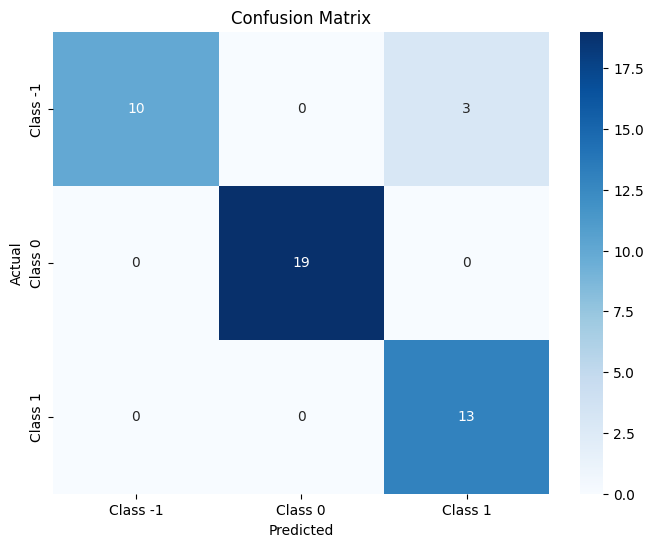

In [119]:
# Confusion Matrix
cm = confusion_matrix(y_test_true, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class -1', 'Class 0', 'Class 1'],
            yticklabels=['Class -1', 'Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Comparison with Single-Layer Perceptron

In [120]:
print("Comparison between Single-Layer and Multi-Layer Perceptrons:")
print("\nSingle-Layer Perceptron (from previous notebook): ~38% accuracy")
print(f"Multi-Layer Perceptron (this notebook): {test_accuracy * 100:.2f}% accuracy")
print(f"\nImprovement: {(test_accuracy * 100 - 38):.2f}% points")

Comparison between Single-Layer and Multi-Layer Perceptrons:

Single-Layer Perceptron (from previous notebook): ~38% accuracy
Multi-Layer Perceptron (this notebook): 93.33% accuracy

Improvement: 55.33% points


## Testing with Sample Data

In [121]:
# Test with a sample from each class
sample_indices = [
    np.where(y_test_true == 0)[0][0],  # First sample of class -1
    np.where(y_test_true == 1)[0][0],  # First sample of class 0
    np.where(y_test_true == 2)[0][0]   # First sample of class 1
]

for i in sample_indices:
    sample = X_test[i:i+1]
    true_class = y_test_true[i]
    pred_class = y_test_pred[i]
    probabilities = mlp.predict_proba(sample)[0]
    
    class_map = {0: -1, 1: 0, 2: 1}
    
    print(f"\nSample {i}: ")
    print(f"  True class: {class_map[true_class]}")
    print(f"  Predicted class: {class_map[pred_class]}")
    print(f"  Probabilities: Class -1: {probabilities[0]:.4f}, Class 0: {probabilities[1]:.4f}, Class 1: {probabilities[2]:.4f}")
    print(f"  Correct: {'Yes' if true_class == pred_class else 'No'}")


Sample 0: 
  True class: -1
  Predicted class: -1
  Probabilities: Class -1: 0.9931, Class 0: 0.0020, Class 1: 0.0021
  Correct: Yes

Sample 1: 
  True class: 0
  Predicted class: 0
  Probabilities: Class -1: 0.0069, Class 0: 0.9970, Class 1: 0.0000
  Correct: Yes

Sample 2: 
  True class: 1
  Predicted class: 1
  Probabilities: Class -1: 0.0034, Class 0: 0.0000, Class 1: 0.9990
  Correct: Yes
